# Data Preparation

In [1]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 12)


## One-Hot Encoding

One hot encoding takes this:

| week |
|------|
| Mon  |
| Tue  |
| Wed  |
| Thu  |
| Fri  |

and converts it into:

| Mon | Tue | Wed | Thu | Fri |
|-----|-----|-----|-----|-----|
| 1   | 0   | 0   | 0   | 0   |
| 0   | 1   | 0   | 0   | 0   |
| 0   | 0   | 1   | 0   | 0   |
| 0   | 0   | 0   | 1   | 0   |
| 0   | 0   | 0   | 0   | 1   |

In [3]:
# One-hot encode categorical features
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,46,46,46,41,False,False,False,False,False,True,False


In [4]:
print('Shape of features after one-hot encoding:', features.shape)


Shape of features after one-hot encoding: (348, 18)


## Features and Labels

In [5]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])
print(labels)
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)
#print(features)

[45 44 41 40 44 51 45 48 50 52 45 49 55 49 48 54 50 54 48 52 52 57 48 51
 54 56 57 56 52 48 47 46 51 49 49 53 49 51 57 62 56 55 58 55 56 57 53 51
 53 51 51 60 59 61 60 57 53 58 55 59 57 64 60 53 54 55 56 55 52 54 49 51
 53 58 63 61 55 56 57 53 54 57 59 51 56 64 68 73 71 63 69 60 57 68 77 76
 66 59 58 60 59 59 60 68 77 89 81 81 73 64 65 55 59 60 61 64 61 68 77 87
 74 60 68 77 82 63 67 75 81 77 82 65 57 60 71 64 63 66 59 66 65 66 66 65
 64 64 64 71 79 75 71 80 81 92 86 85 67 65 67 65 70 66 60 67 71 67 65 70
 76 73 75 68 69 71 78 85 79 74 73 76 76 71 68 69 76 68 74 71 74 74 77 75
 77 76 72 80 73 78 82 81 71 75 80 85 79 83 85 88 76 73 77 73 75 80 79 72
 72 73 72 76 80 87 90 83 84 81 79 75 70 67 68 68 68 67 72 74 77 70 74 75
 79 71 75 68 69 71 67 68 67 64 67 76 77 69 68 66 67 63 65 61 63 66 63 64
 68 57 60 62 66 60 60 62 60 60 61 58 62 59 62 62 61 65 58 60 65 68 59 57
 57 65 65 58 61 63 71 65 64 63 59 55 57 55 50 52 55 57 55 54 54 49 52 52
 53 48 52 52 52 46 50 49 46 40 42 40 41 36 44 44 43

## Training and Testing Sets

In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [8]:

train_features[:,5]
#print('Training Labels Shape:', train_labels.shape)
#print('Testing Features Shape:', test_features.shape)
#print('Testing Labels Shape:', test_labels.shape)

array([69.7, 58.1, 77.3, 64.7, 47.5, 48.2, 48.6, 76.7, 45.2, 46.1, 45.3,
       76.3, 74.4, 45.3, 72.2, 67.3, 47.7, 77.0, 54.7, 45.1, 47.6, 53.2,
       58.6, 55.3, 48.8, 45.6, 67.1, 57.1, 65.7, 71.8, 54.2, 50.5, 51.8,
       49.5, 45.2, 60.1, 65.6, 47.3, 46.3, 46.2, 68.0, 74.6, 46.7, 68.6,
       68.7, 55.0, 56.8, 76.1, 73.1, 50.3, 73.9, 77.4, 56.6, 53.3, 75.0,
       57.2, 66.5, 61.8, 57.4, 58.4, 53.1, 48.1, 49.2, 66.7, 62.5, 53.0,
       57.4, 45.7, 63.2, 67.0, 45.5, 55.7, 52.7, 70.6, 52.4, 73.5, 62.1,
       45.3, 70.7, 71.7, 71.5, 64.1, 49.3, 46.8, 76.8, 73.8, 60.3, 76.9,
       69.0, 61.4, 46.6, 45.1, 68.3, 47.8, 69.8, 71.2, 73.3, 68.2, 72.8,
       45.8, 61.0, 53.4, 73.0, 62.1, 54.8, 76.4, 51.0, 63.6, 54.0, 56.2,
       48.6, 55.3, 53.9, 59.2, 77.1, 77.4, 64.8, 74.2, 66.8, 49.9, 46.8,
       52.7, 51.2, 55.6, 74.6, 53.4, 69.0, 46.9, 49.1, 48.5, 71.0, 66.4,
       66.5, 64.5, 76.7, 50.7, 57.1, 61.4, 72.8, 77.2, 62.8, 49.5, 56.2,
       59.5, 77.3, 65.4, 48.4, 45.1, 66.2, 53.7, 46

## Establish Baseline

In [9]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  5.06 degrees.


## Training the Forest

In [10]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

We can create models with different hyperparameters to try and boost performance. The only way to find the best ones
are to try a few and evaluate them! 

In [11]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

## Make Predictions on Test Data

In [12]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
#print(predictions)
# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 3.87 degrees.


In [13]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


In [14]:
#print('The depth of this tree is:', tree.tree_.max_depth)

## Variable Importances

In [15]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


### Two Most Important Features

In [16]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


## Visualizations

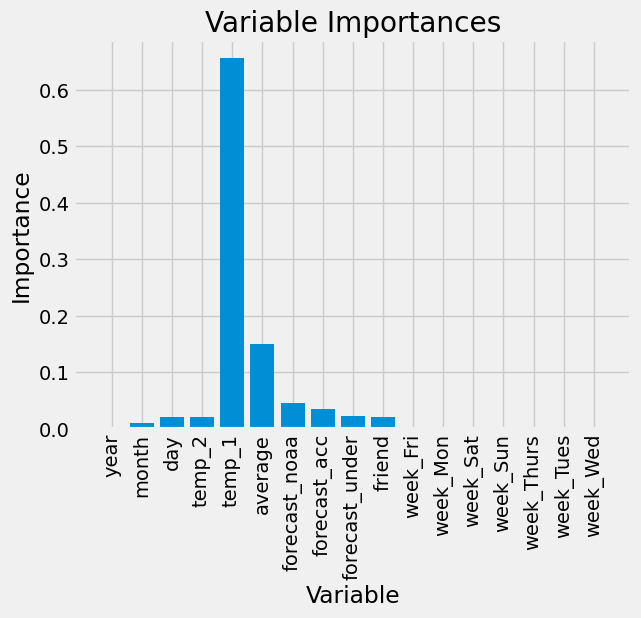

In [17]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [18]:
import datetime

# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})


ValueError: rotation must be 'vertical', 'horizontal' or a number, not 60

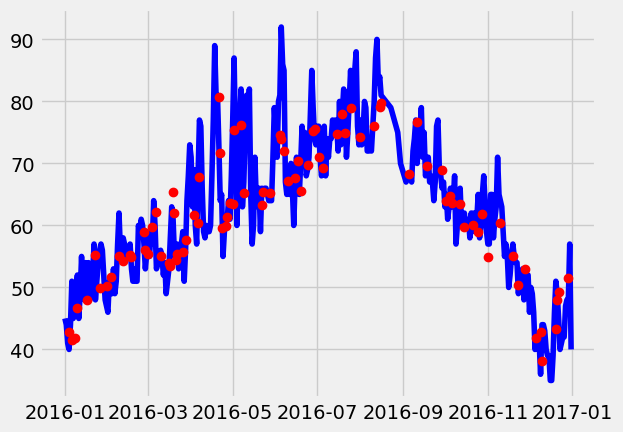

In [19]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');


In [ ]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');